<a href="https://colab.research.google.com/github/IngerMasha/week14/blob/main/day2/Exercises_XP_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

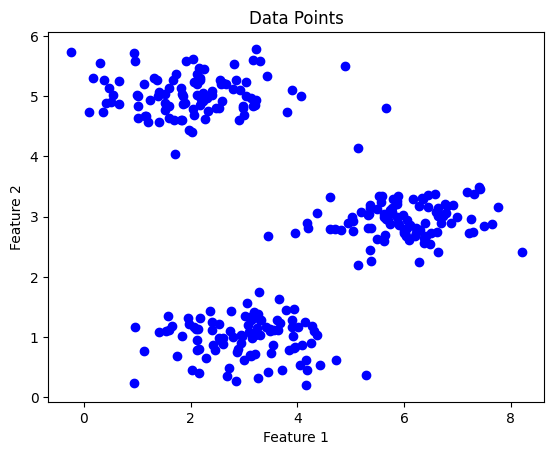

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.show()


In [3]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]  # number of data points
    K = centroids.shape[0]  # number of centroids
    idx = np.zeros(m)

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)

    return idx
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print(idx[:3])  # Print the index of the closest centroid for the first 3 data points


[0. 2. 1.]


In [4]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points_assigned = X[idx == k]
        centroids[k] = np.mean(points_assigned, axis=0)

    return centroids
K = 3
new_centroids = compute_centroids(X, idx, K)
print(new_centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


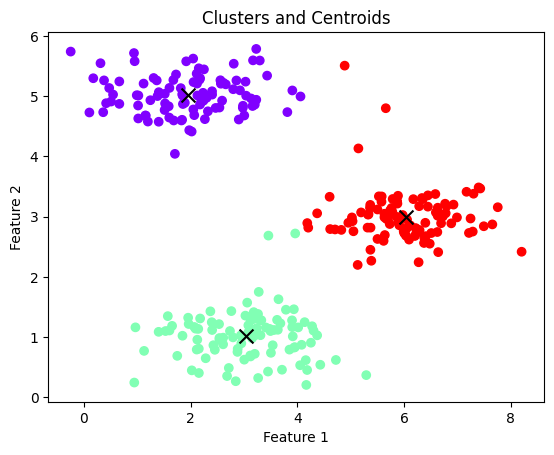

In [5]:
def run_k_means(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

max_iters = 10
centroids, idx = run_k_means(X, initial_centroids, max_iters)

plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='rainbow', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters and Centroids')
plt.show()

In [6]:
def init_centroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    rand_indices = np.random.permutation(m)
    centroids = X[rand_indices[:K]]

    return centroids

K = 3
initial_centroids = init_centroids(X, K)
print(initial_centroids)

[[2.17777173 4.86154019]
 [2.1159935  0.7930365 ]
 [4.60630534 3.329458  ]]
